In [1]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [3]:
# Parameters
gams = [-0.05, 0.05]	# Gammas to search through
L = 2					# Boundaries
K = 1					# K value for schrodinger harmonic oscillator
dx = 0.1				# Step size
tol = 1e-6				# Tolerance
deps0 = 0.01			# Initial value for depsilon

In [4]:
# Setup
N = int(2*L / dx)					# Number of points to iterate through
xspan = np.linspace(-L, L, N + 1)	# Linear space of points
pds = [] 							# Probability densities cumulator

def bvp_rhs(x, psi, gam, eps): 		# Define the Schrodinger equation
	return [psi[1], (gam * np.abs(psi[0])**2 + K*x**2 - eps) * psi[0]]

In [6]:
# Gamma loop: find different probability densities
for gam in gams:
	# Shooting

	# Define our initial conditions
	psi0 = 0.1 	# Initial value for psi -- can be anything except 0
	eps0 = 0	# Initial value for epsilon

	# Cumulator
	eigvals = []	# Eigenvalue cuulator
	eigvecs = []	# Eigenvector cumulator

	# Find first 2 modes
	for modes in range(2):
		eps = eps0		# Start search for epsilon
		deps = deps0	# Change in epsilon
		
		# Epsilon loop
		for _ in range(1000):	# Find epsilon in 1000 steps max; fail safe
			dpsi0 = psi0*np.sqrt(K*L**2 - eps)		# Initial dpsi value
			initial = [psi0, dpsi0]					# Initial values for psi and dpsi 

			# Find solution with current conditions
			sol = solve_ivp(
				bvp_rhs, 
				[xspan[0], xspan[-1]], 
				initial, 
				t_eval=xspan,
				args=(gam, eps)
			)

			psisol = sol.y[0]	# Solutoins for psi
			dpsisol = sol.y[1]	# Solutions for dpsi

			norm = np.trapz(psisol**2, xspan)	# Normamilzation of area -- goal is to be 1 (pdf)
			psi0 /= np.sqrt(norm)				# Normalize 

			# Function at boundary -- aim is to be 0
			bv = dpsisol[-1] + np.sqrt(K*L**2 - eps) * psisol[-1]

			# If found solution (0) and norm (1) are within tolerance 
			if np.abs(bv) < tol and np.abs(norm - 1) < tol:
				# print(eps)	# Log eigenvalue
				# print(norm)	# Log norm
				break		# Stop searching; move onto next eigenvalue

			# If below target increase epsilon, else decrease epsilon
			if (-1) ** (modes) * bv > 0:
				eps += deps		# Increase epsilon
			else:
				eps -= deps/2	# Binary search for epsilon
				deps /= 2		# Binary search for epsilon

		eigvals.append(eps)				# Save eigenvalue
		eigvecs.append(np.abs(psisol))	# Save eigenvector

		eps0 = eps + 0.1	# Increase epsilon; search for next eigenvalue
		
	pds.append([eigvecs, eigvals])	# Save valid probability density

Gamma: -0.05
Eigenvalues: [0.9740423583984381, 2.8931207275390456]


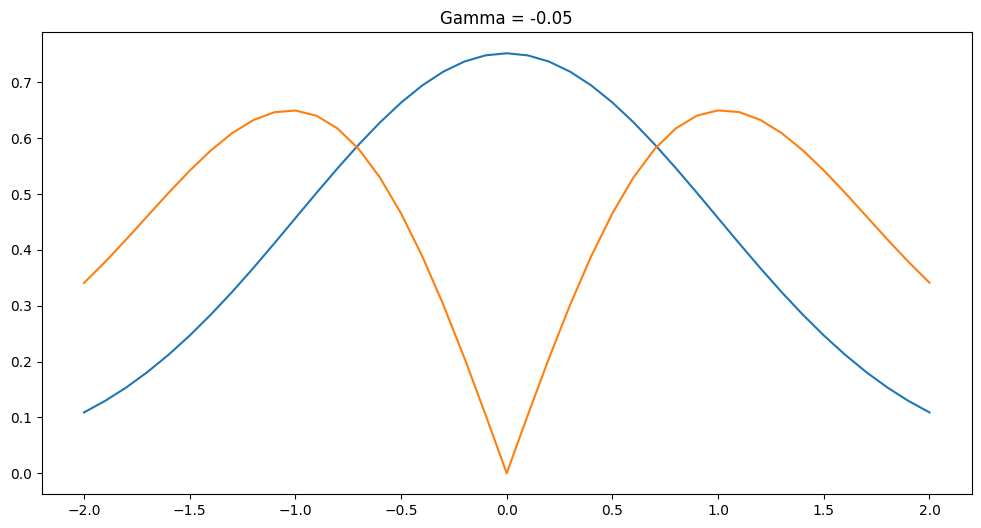

Gamma: 0.05
Eigenvalues: [1.0129449462890632, 2.9214059448242002]


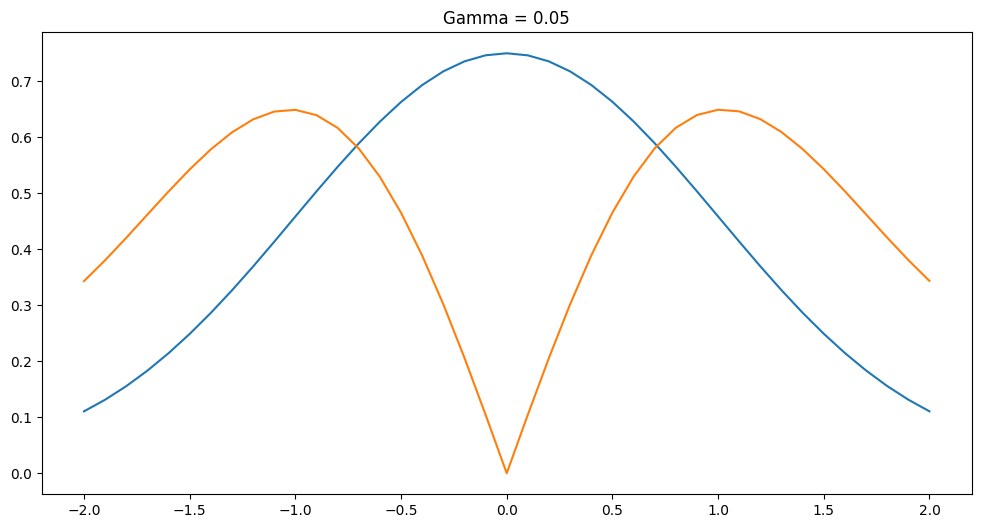

In [9]:

for i in range(len(gams)):
	gam = gams[i]
	pd = pds[i]

	eigvecs, eigvals = pd

	print(f'Gamma: {gam}')
	print(f'Eigenvalues: {eigvals}')

	# Plot y1 against xspan for gamma = 0.05
	plt.figure(figsize=(12, 6))
	plt.title(f'Gamma = {gam}')
	for eigvec in eigvecs:
		plt.plot(xspan, eigvec)
	plt.show()